In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

In [4]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
# preprocessing using Min Max Scalerr
scaler = MinMaxScaler()
df[['Income($)', 'Age']] = scaler.fit_transform(df[['Income($)', 'Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


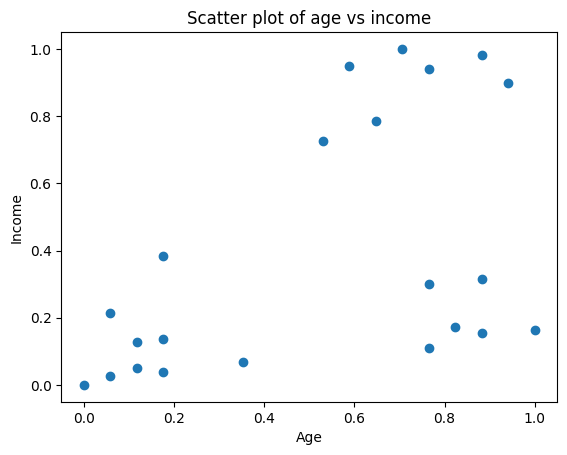

In [6]:
plt.scatter(df['Age'],df['Income($)'])
plt.title("Scatter plot of age vs income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# Applying elbow method to determine the appropriate number of clusters

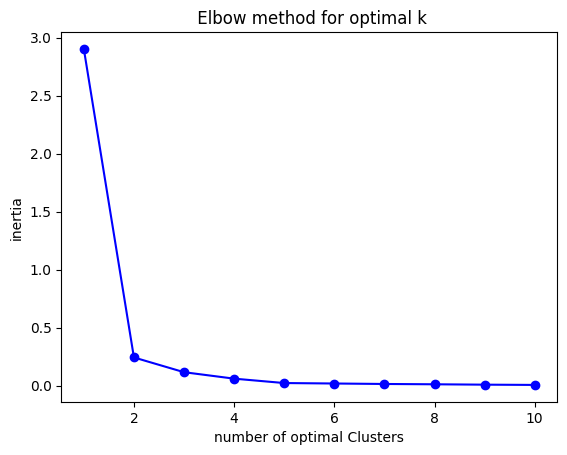

In [7]:
inertia=[]
k_values = range(1,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Income($)']],df[['Age']])
    inertia.append(kmeans.inertia_)

plt.plot(k_values,inertia,'bo-')
plt.title(" Elbow method for optimal k")
plt.xlabel("number of optimal Clusters")
plt.ylabel("inertia")
plt.show()

# applying k means  for the optimal k

In [8]:
km=KMeans(n_clusters=2)
km.fit(df[['Age','Income($)']])

KMeans(n_clusters=2)

In [9]:
df['Clusters']=km.labels_
df

,Name,Age,Income($),Clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


Initial Centroids:
[[0.78280543 0.57659435]
 [0.1372549  0.11633428]]
Cluster Assignments:
[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1]
New Centroids:
[[0.61538462 0.78431373]
 [0.11581197 0.2       ]]


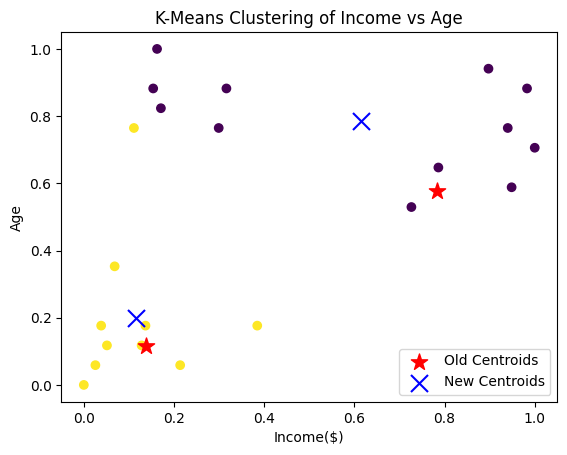

Centroids have moved
Cluster Assignments:
[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
New Centroids:
[[0.57659435 0.78280543]
 [0.11633428 0.1372549 ]]


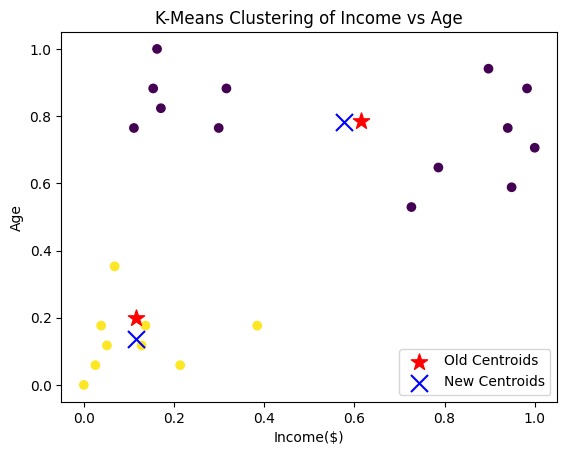

Centroids have moved
Cluster Assignments:
[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
New Centroids:
[[0.57659435 0.78280543]
 [0.11633428 0.1372549 ]]


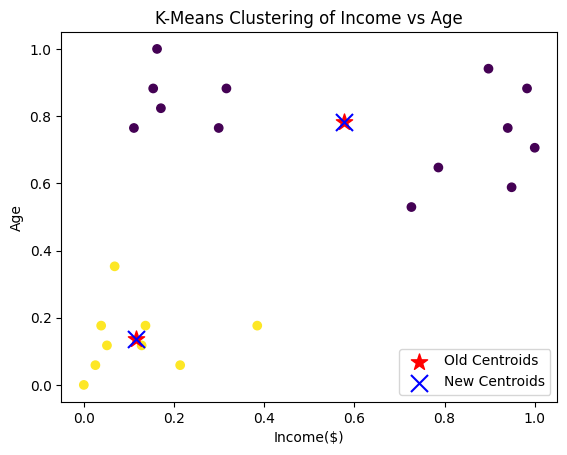

Centroids have converged


In [11]:
# Initialize Centroids
centers = km.cluster_centers_
print(f'Initial Centroids:\n{centers}')

while True:

    # Step 1: Assign data points to nearest centroid
    labels = pairwise_distances_argmin(df[['Income($)', 'Age']], centers)
    df['Clusters'] = labels
    print(f'Cluster Assignments:\n{labels}')

    # Step 2: Recalculate centroids
    new_centers = df.groupby('Clusters')[['Income($)', 'Age']].mean().values
    print(f'New Centroids:\n{new_centers}')

    # Step 3: Plot data points and centroids
    plt.scatter(df['Income($)'], df['Age'], c=df['Clusters'], cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], s=150, c='red', marker='*', label='Old Centroids')
    plt.scatter(new_centers[:, 0], new_centers[:, 1], s=150, c='blue', marker='x', label='New Centroids')
    plt.title("K-Means Clustering of Income vs Age")
    plt.xlabel("Income($)")
    plt.ylabel("Age")
    plt.legend()
    plt.show()

    # Step 4: Check for convergence
    if np.allclose(centers, new_centers):
        print("Centroids have converged")
        break
    else:
        print("Centroids have moved")
        centers = new_centers  # Update centroids for the next iteration
